In [32]:
import pandas as pd

In [34]:
df = pd.read_csv("netflix_titles.csv")

In [36]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [38]:
df.shape   # satır ve sütunlar için

(8807, 12)

In [40]:
df.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

In [42]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [44]:
#df.dropna(subset=["director", "cast", "country", "date_added" ], inplace=True)  # eksik verileri temizledi

In [28]:
#df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          1
duration        3
listed_in       0
description     0
dtype: int64

In [60]:
df["rating"].fillna("unknow",inplace=True)
df["director"].fillna("unknow",inplace=True)
df["cast"].fillna("unknow",inplace=True)
df["country"].fillna("unknow",inplace=True)
df["duration"].fillna("unknow",inplace=True)

C:\Users\Msı\AppData\Local\Temp\ipykernel_4436\2604955604.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["duration"].fillna("unknow",inplace=True)


In [70]:
df['date_added'].fillna(df['release_year'].astype(str) + "-01-01")
df['date_added'] = pd.to_datetime(df['date_added'], format='%y-%m-%d', errors='coerce')

In [76]:
df['date_added'] = df['date_added'].astype(str)
df.loc[df['date_added'] == 'NaT', 'date_added'] = df['release_year'].astype(str) + '-01-01'
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [78]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [80]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknow,United States,2020-01-01,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknow,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-01-01,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknow,2021-01-01,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknow,unknow,unknow,2021-01-01,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknow,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-01-01,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007-01-01,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,unknow,unknow,unknow,2018-01-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009-01-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006-01-01,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [82]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807.000000,8807,8807,8807,8807
unique,8807,2,8807,4529,7693,749,NaN,NaN,18,221,514,8775
top,s1,Movie,Dick Johnson Is Dead,unknow,unknow,United States,NaN,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2634,825,2818,NaN,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-07 16:27:24.873396224,2014.180198,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925-01-01 00:00:00,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-01 00:00:00,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:00,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,2019.000000,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01 00:00:00,2021.000000,NaN,NaN,NaN,NaN


In [84]:
import matplotlib.pyplot as plt 
import seaborn as sns

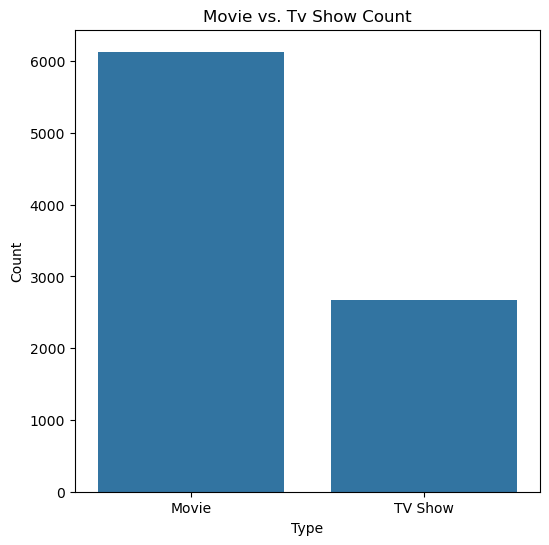

In [96]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(6,6))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Movie vs. Tv Show Count')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

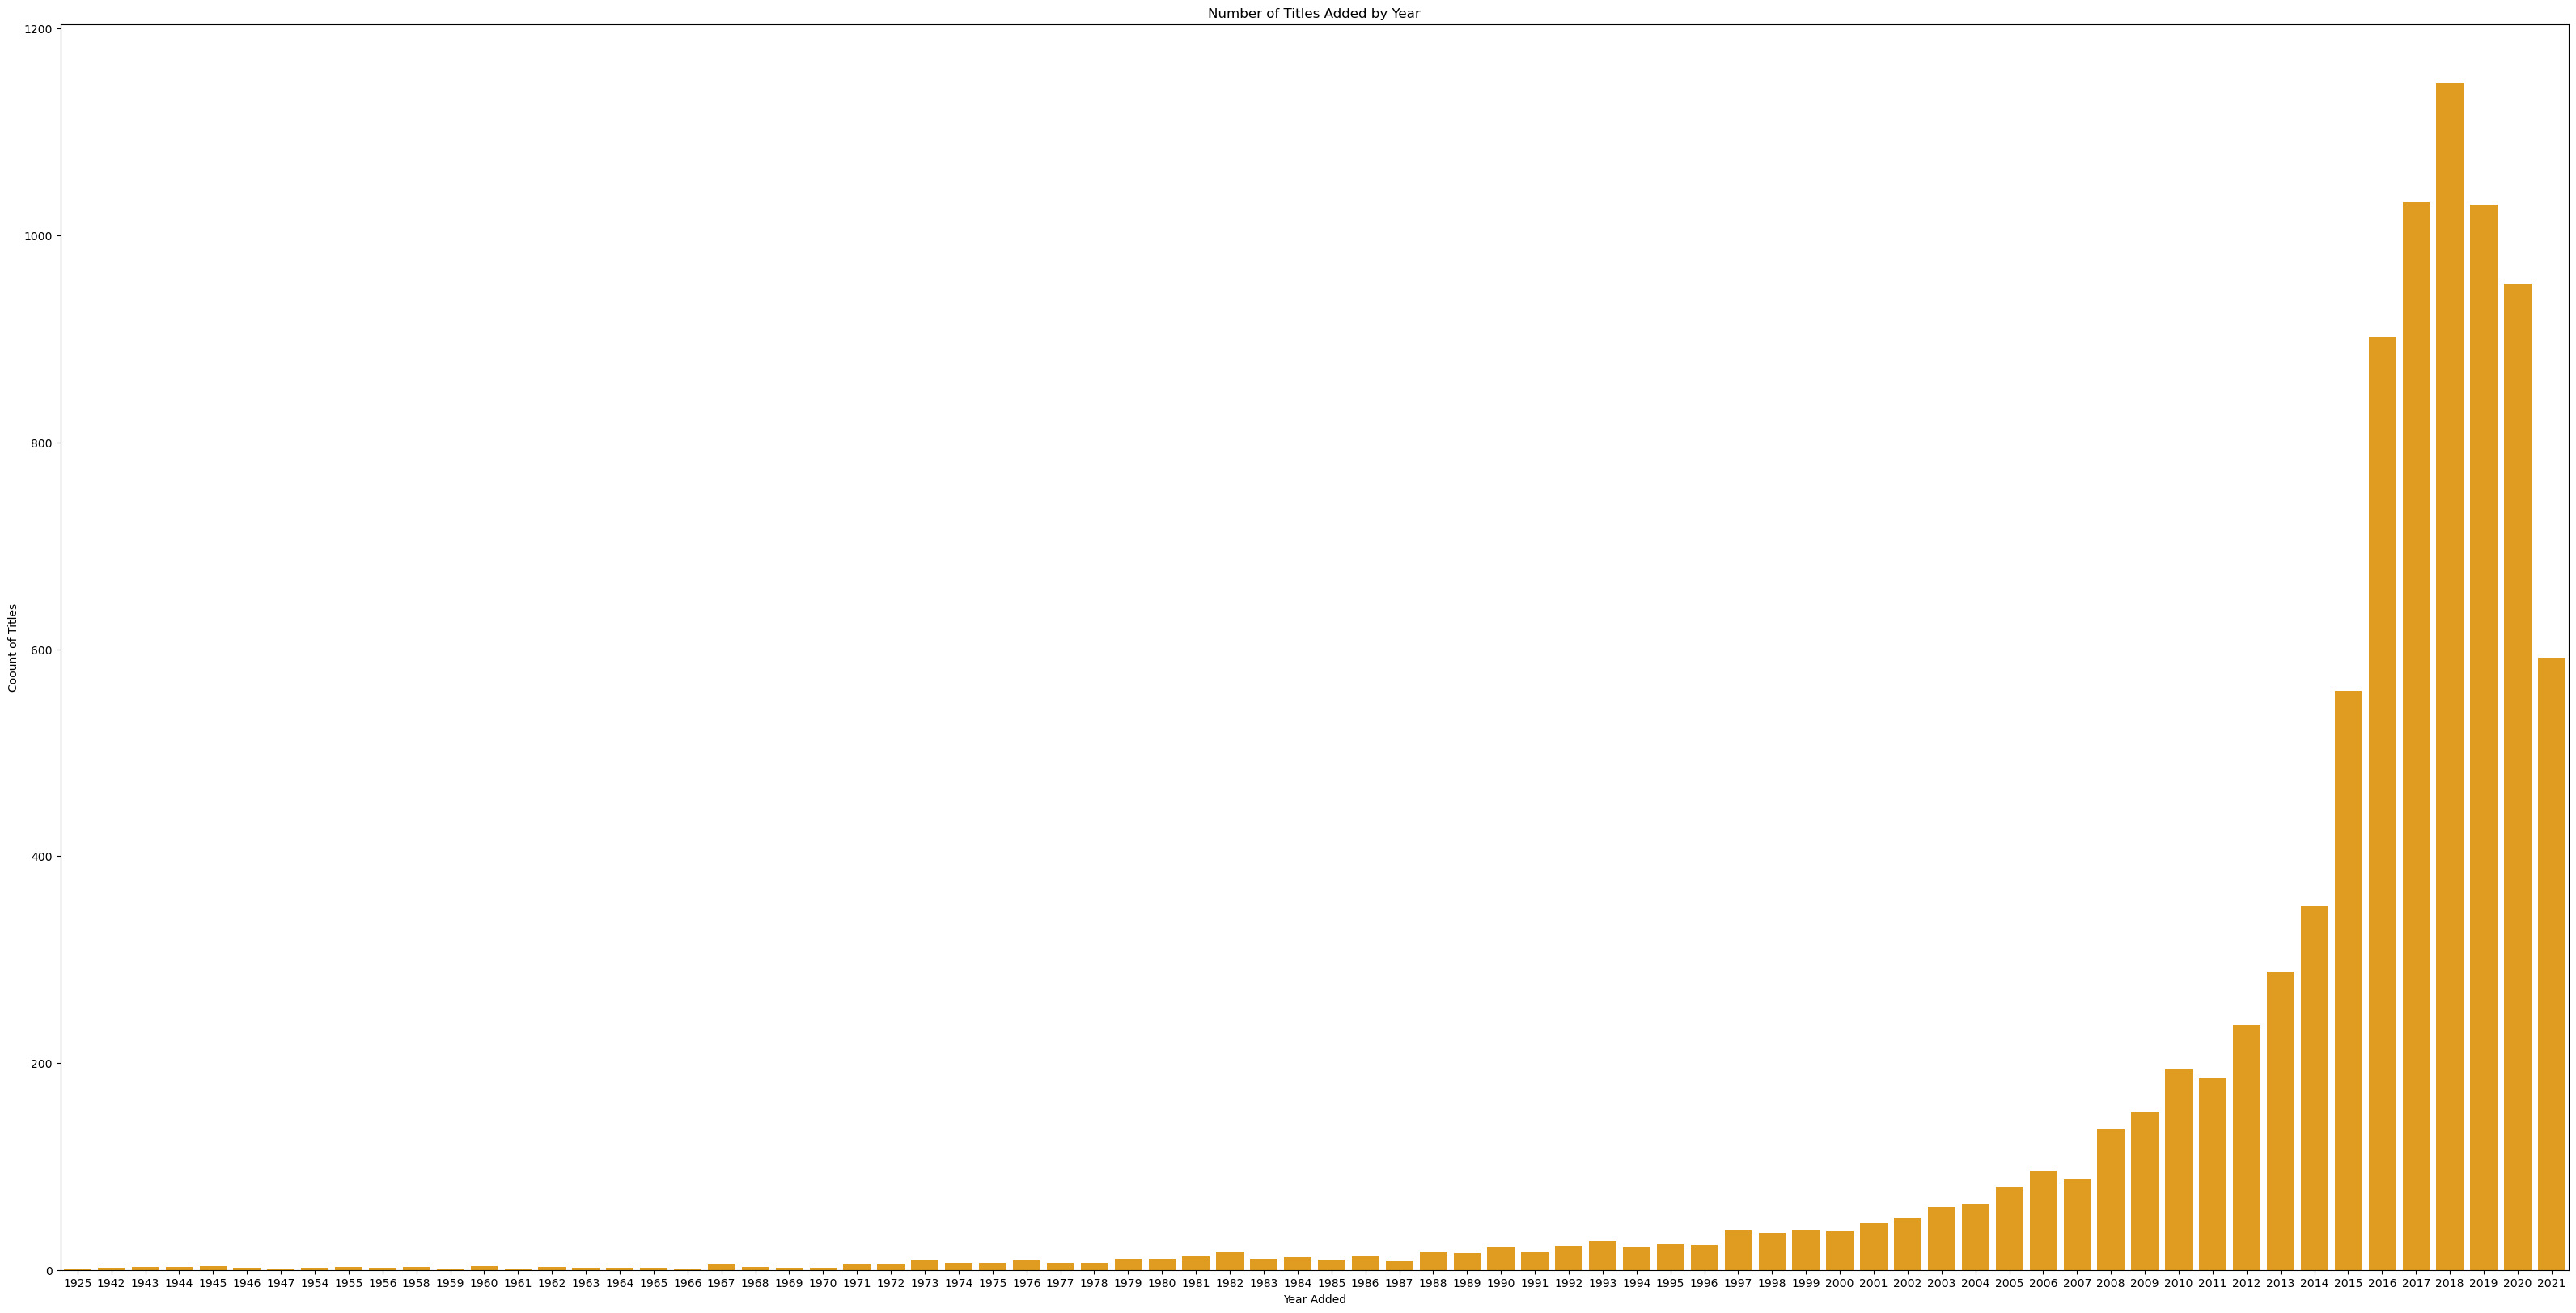

In [128]:
df['year_added'] = df['date_added'].dt.year
year_counts = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(40,20))
sns.barplot(x=year_counts.index, y=year_counts.values, color='orange')
plt.title('Number of Titles Added by Year')
plt.xlabel('Year Added')
plt.ylabel('Coount of Titles')
plt.show()

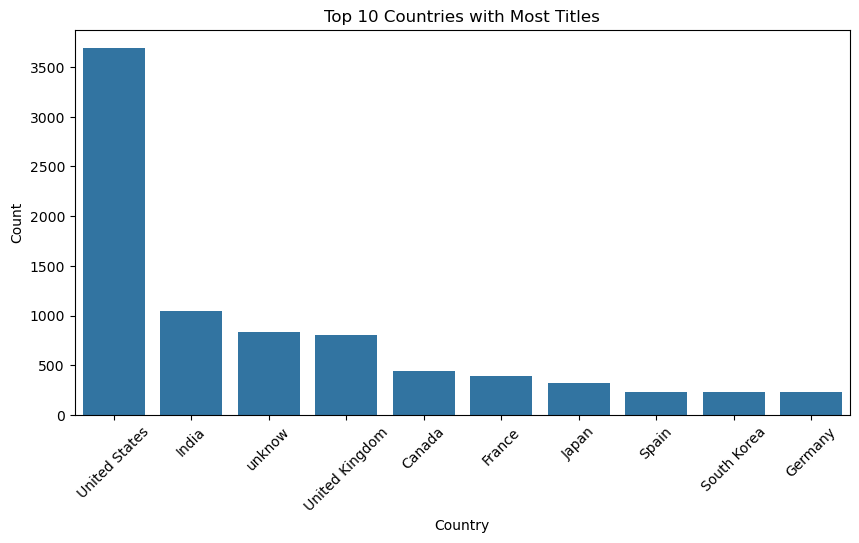

In [136]:
country_list = df['country'].dropna().apply(lambda x:[i.strip() for i in x.split(',')])
from collections import Counter
country_counts= Counter()
for countries in country_list:
    country_counts.update(countries)

most_common_countries = country_counts.most_common(10)
countries, counts = zip(*most_common_countries)
plt.figure(figsize=(10,5))
sns.barplot(x=list(countries), y=list(counts))
plt.title('Top 10 Countries with Most Titles')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

    

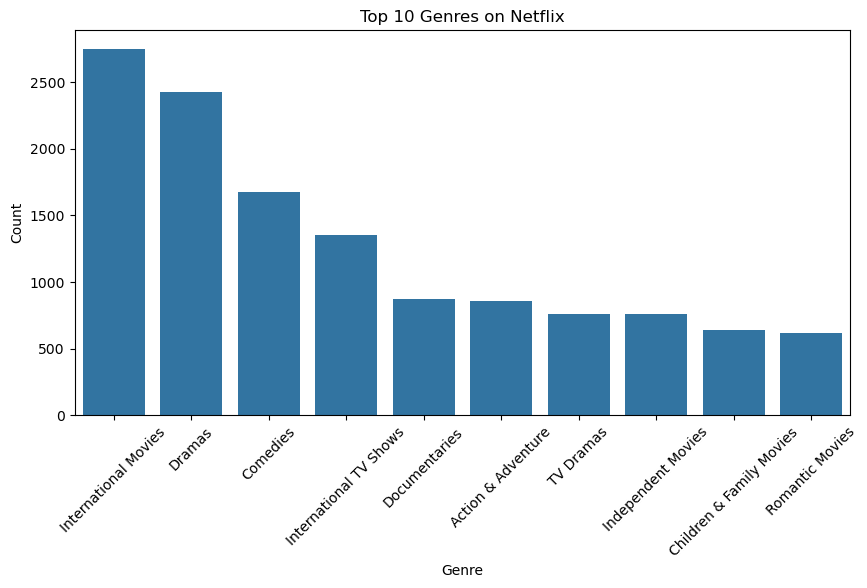

In [152]:
genre_list = df['listed_in'].dropna().apply(lambda x:[i.strip() for i in x.split(',')])

genre_counts = Counter()
for genres in genre_list:
    genre_counts.update(genres)

most_common_genres = genre_counts.most_common(10)
genres, counts = zip(*most_common_genres)

plt.figure(figsize=(10,5))
sns.barplot(x=list(genres), y=list(counts))
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


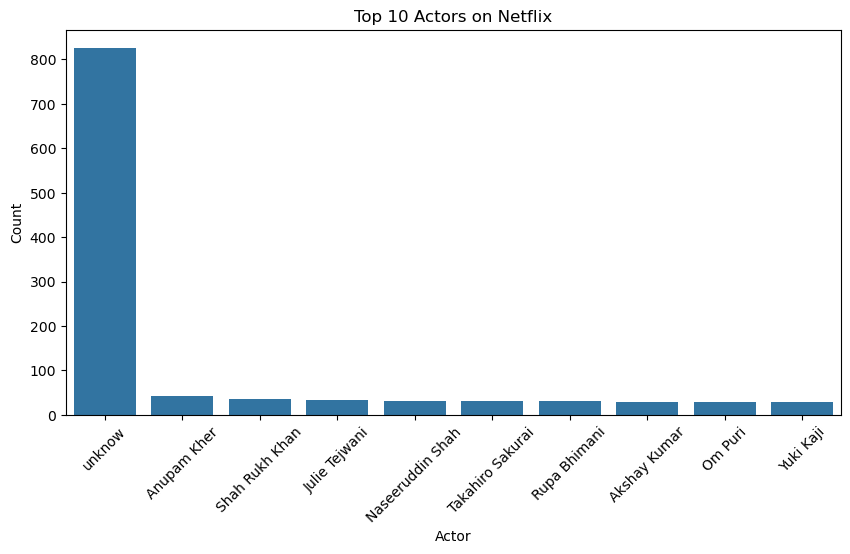

In [166]:
cast_list = df['cast'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
cast_counts = Counter()
for actors in cast_list:
    cast_counts.update(actors)

most_common_actors = cast_counts.most_common(10)
actors, actor_counts =zip(*most_common_actors)

plt.figure(figsize=(10,5))
sns.barplot(x=list(actors), y=list(actor_counts))
plt.title('Top 10 Actors on Netflix')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.xticks(rotation=45) 	
plt.show()